In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel("D:\YEAR2SEM2\DATA VISUALIZATION AND STORYTELLING\DATA VIZ\Mag6PlusEarthquakes_1900-2013.xlsx")
data.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\Y'
<>:1: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9380\883877607.py:1: SyntaxWarning: invalid escape sequence '\Y'
  data=pd.read_excel("D:\YEAR2SEM2\DATA VISUALIZATION AND STORYTELLING\DATA VIZ\Mag6PlusEarthquakes_1900-2013.xlsx")


,time,Date,Time,Unnamed: 3,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-03-17T05:11:34.980Z,2014-03-17,05:11:34,NaN,-20.0030,-70.8741,17.0,6.2,mww,NaN,82.0,1.171,1.37,us,usc000ndw9,2014-03-17T14:57:11.000Z,"80km WNW of Iquique, Chile",earthquake
1,2014-03-16T21:16:30.770Z,2014-03-16,21:16:30,NaN,-19.9246,-70.6278,20.0,6.7,mww,NaN,44.0,0.929,1.16,us,usc000ndnj,2014-03-17T18:43:29.249Z,"60km WNW of Iquique, Chile",earthquake
2,2014-03-15T23:51:30.610Z,2014-03-15,23:51:30,NaN,-5.5660,-80.8790,9.8,6.3,mwp,NaN,90.0,6.253,1.00,us,usc000nd0c,2014-03-18T17:52:18.000Z,"6km W of Sechura, Peru",earthquake
3,2014-03-15T08:59:21.790Z,2014-03-15,08:59:21,NaN,-14.0935,-76.2968,20.0,6.1,mww,NaN,71.0,2.159,1.02,us,usc000ncbl,2014-03-16T05:34:44.387Z,"25km S of Paracas, Peru",earthquake
4,2014-03-13T17:06:50.800Z,2014-03-13,17:06:50,NaN,33.6793,131.8197,79.0,6.3,mwb,NaN,14.0,0.963,1.26,us,usc000nabv,2014-03-17T23:24:32.491Z,"15km NNE of Kunisaki-shi, Japan",earthquake


In [4]:
data.isna().sum()

time             0
Date             0
Time             0
Unnamed: 3    8313
latitude         0
longitude        0
depth            0
mag              1
magType         15
nst            202
gap           7215
dmin          8149
rms           7149
net              0
id               0
updated          0
place            9
type             0
dtype: int64

In [5]:
data.drop('Unnamed: 3',axis=1, inplace=True)

In [6]:
data.dtypes

time                 object
Date         datetime64[ns]
Time                 object
latitude            float64
longitude           float64
depth               float64
mag                 float64
magType              object
nst                 float64
gap                 float64
dmin                float64
rms                 float64
net                  object
id                   object
updated              object
place                object
type                 object
dtype: object

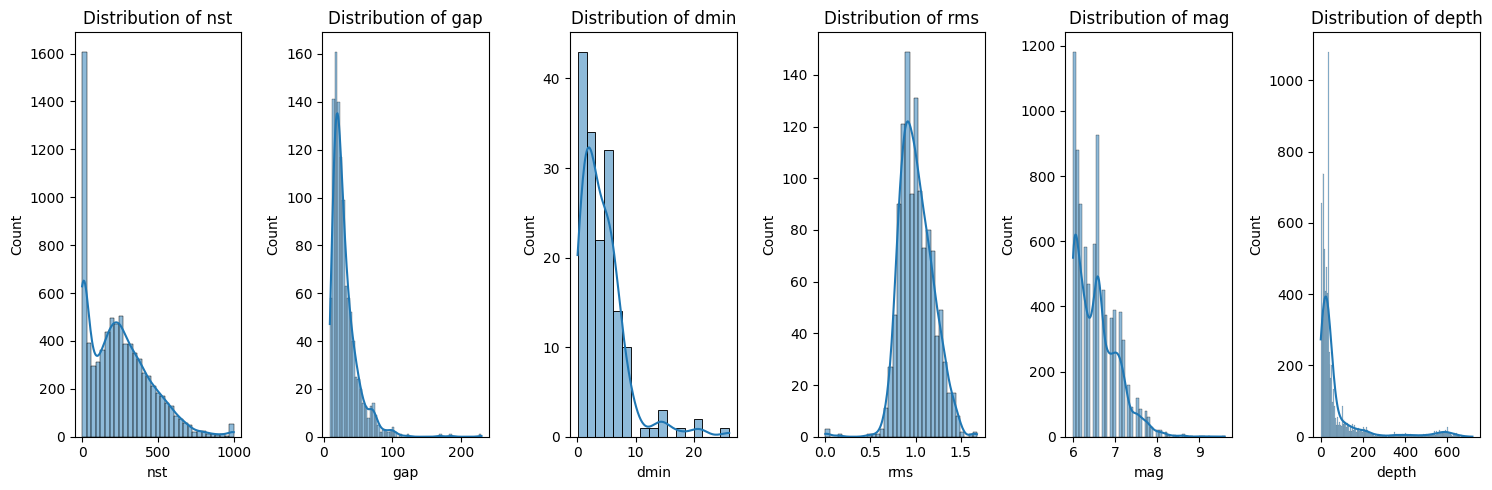

In [7]:
features = ['nst', 'gap', 'dmin','rms','mag','depth']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(15,5))  # 1 row, multiple columns

# Loop through features and create visualizations
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i])  # Histogram with KDE
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

nst,gap,dmin and mag are postively skewed. The tail is longer on the right and more data points are on the left. Mean>median>mode and skewness>0

rms is negatively skewed. The tail is longer on the left and more data points are on the right. Mean<median<mode and skewness>0

In [8]:
#imputing the missing values with median
data['nst']=data['nst'].fillna(data['nst'].median())
data['gap']=data['gap'].fillna(data['gap'].median())
data['dmin']=data['dmin'].fillna(data['dmin'].median())
data['rms']=data['rms'].fillna(data['rms'].median())
data['mag']=data['mag'].fillna(data['mag'].median())

In [9]:
data['magType'].mode()

0    ms
Name: magType, dtype: object

In [10]:
data['place'].mode()

0    Vanuatu
Name: place, dtype: object

In [11]:
data['magType']=data['magType'].fillna(data['magType'].mode().iloc[0])
data['place']=data['place'].fillna(data['place'].mode().iloc[0])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9380\223649127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], ax=axes[i], palette='Set2')  # Count plot for categorical variables
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9380\223649127.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], ax=axes[i], palette='Set2')  # Count plot for categorical variables


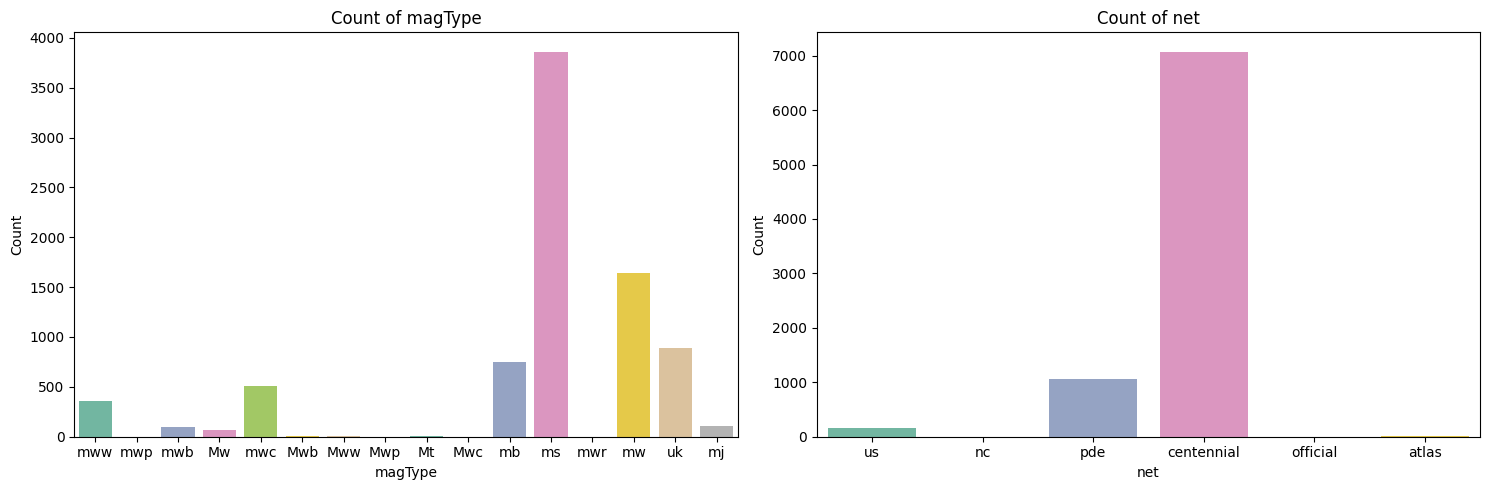

In [12]:
# Categorical features to visualize
categorical_features = ['magType', 'net']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))  # 1 row, multiple columns

# Loop through categorical features and create count plots
for i, feature in enumerate(categorical_features):
    sns.countplot(x=data[feature], ax=axes[i], palette='Set2')  # Count plot for categorical variables
    axes[i].set_title(f'Count of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [13]:
data.isna().sum()

time         0
Date         0
Time         0
latitude     0
longitude    0
depth        0
mag          0
magType      0
nst          0
gap          0
dmin         0
rms          0
net          0
id           0
updated      0
place        0
type         0
dtype: int64

Thee Linear Regression Model

In [14]:
import sklearn
# import tensorflow
# import keras
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
predict='mag'

In [16]:
data.columns

Index(['time', 'Date', 'Time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type'],
      dtype='object')

In [17]:
data.dtypes

time                 object
Date         datetime64[ns]
Time                 object
latitude            float64
longitude           float64
depth               float64
mag                 float64
magType              object
nst                 float64
gap                 float64
dmin                float64
rms                 float64
net                  object
id                   object
updated              object
place                object
type                 object
dtype: object

In [18]:
df = data.drop(columns=["time", "place", "magType","Date","Time","magType","net","id","updated","type"])
df.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
0,-20.0030,-70.8741,17.0,6.2,221.0,82.0,1.171,1.37
1,-19.9246,-70.6278,20.0,6.7,221.0,44.0,0.929,1.16
2,-5.5660,-80.8790,9.8,6.3,221.0,90.0,6.253,1.00
3,-14.0935,-76.2968,20.0,6.1,221.0,71.0,2.159,1.02
4,33.6793,131.8197,79.0,6.3,221.0,14.0,0.963,1.26


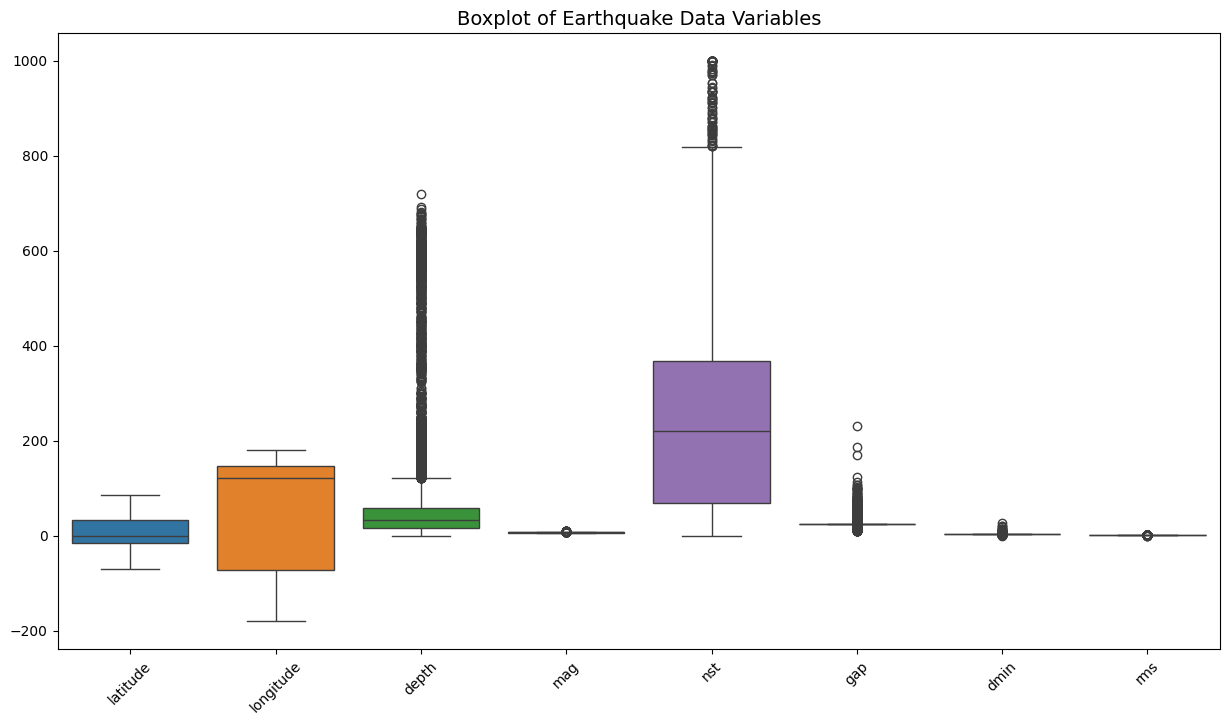

In [19]:
#handling outliers
#Set the figure size
plt.figure(figsize=(15, 8))

#create multiple boxplots in one frame
sns.boxplot(data=df)

#Set title and rotate x-axis labels for better readability
plt.title("Boxplot of Earthquake Data Variables", fontsize=14)
plt.xticks(rotation=45)  # Rotate variable names for visibility

# ✅ Show the plot
plt.show()

In [33]:
q1=df['nst'].quantile(0.25)
q3=df['nst'].quantile(0.75)
iqr=q3-q1
lbound=q1-2.4*iqr
ubound=q3+2.4*iqr

In [34]:
df['nst']=df['nst'].mask((df['nst']>ubound),df['nst'].median())

<Axes: xlabel='nst'>

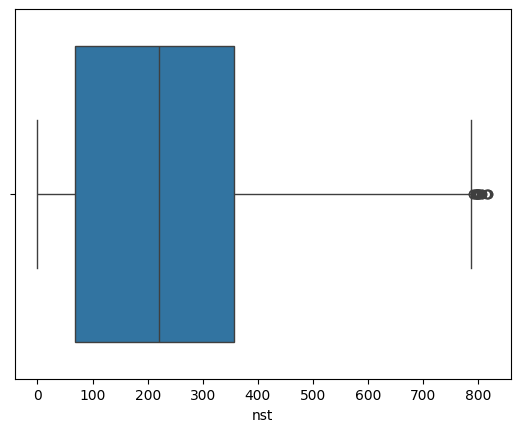

In [35]:
sns.boxplot(x=df['nst'])

In [23]:
X=np.array(df.drop([predict],axis=1))
y=np.array(df[predict])

In [24]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
#Standardize the data (important for better performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#  Make predictions
y_pred = model.predict(X_test)
y_pred

array([6.44421185, 6.7346418 , 6.49895533, ..., 6.59689194, 6.33594718,
       6.40462582])

In [28]:
#Evaluate the model
r2 = r2_score(y_test, y_pred)  # R-squared score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

In [29]:
#Print results
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared Score: 0.0826
Mean Absolute Error: 0.3607
Root Mean Squared Error: 0.4595
